# Exercice 2: MPG

1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

- Quelle est la corrélation de Pearson entre ces deux variables ?

- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?



2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?



2. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.



5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).



Pour cette question aidez-vous du code suivant:



`filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]`

`filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')`

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = sns.load_dataset("mpg")
df.dropna(inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### 1. Analysez l'évolution de la consommation des voitures (mpg) par rapport à la puissance du moteur (horsepower).

- Refaites le graphique correspondant

- Quelle est la corrélation de Pearson entre ces deux variables ?

- Quelle serait la probabilité d'obtenir une telle corrélation ou plus extrême, si en réalité les deux variables étaient totalement décorrélées ?

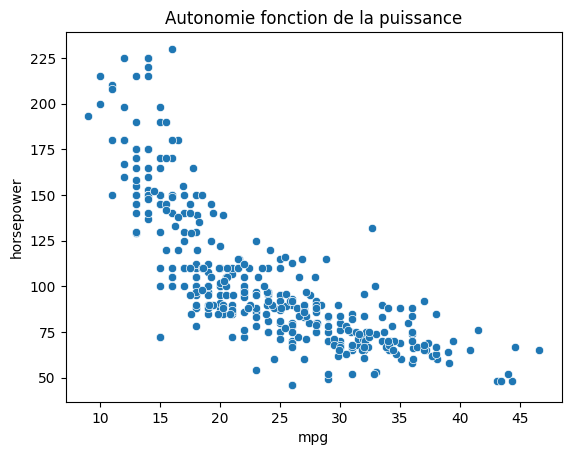

In [3]:
sns.scatterplot(data=df, x="mpg", y="horsepower").set_title("Autonomie fonction de la puissance")
plt.show()

In [2]:
from scipy.stats import pearsonr
pearsonCorel = pearsonr(df["mpg"], df["horsepower"]).correlation

print(f"La corrélation de pearson entre l'autonomie et la puissance des voitures est de {pearsonCorel}")
print()

pvalue = pearsonr(df["mpg"], df["horsepower"]).pvalue
print(f"La probabilité d'obtenir une corrélation au moins aussi elevée si en réalité les 2 variables n'étaient pas corrélées est de {pvalue:.0%}")
print(f"Conclusion: Les variables semblent être corrélées")

La corrélation de pearson entre l'autonomie et la puissance des voitures est de -0.778426783897776

La probabilité d'obtenir une corrélation au moins aussi elevée si en réalité les 2 variables n'étaient pas corrélées est de 0%
Conclusion: Les variables semblent être corrélées


### 2. Peut-on affirmer avec un risque d'erreur de 2% que les voitures du Japon, d'Europe, et des États-Unis ont vu leur autonomie moyenne (mpg) augmenter entre la premiere moitiée des années 70s, et la seconde moitiée des années 70s ?

In [5]:
from scipy.stats import ttest_ind

df_1 = df.query("model_year >= 70 and model_year < 75")
df_2 = df.query("model_year >= 75 and model_year <= 80")
print(df_1["mpg"].mean())
print(df_2["mpg"].mean())

print()
print("H0 : L'autonomie moyenne des voitures n'a pas augmentée entre la première et la seconde moitié des années 70s.")
print()

results = ttest_ind(df_1["mpg"], df_2["mpg"])
alpha = 0.02
print(results.pvalue)
if(results.pvalue < alpha):
	print("Nous pouvons rejeter H0")
else: 
	print("Les données ne nous permettent pas de rejeter H0")


19.22
24.470652173913045

H0 : L'autonomie moyenne des voitures n'a pas augmentée entre la première et la seconde moitié des années 70s.

2.4451466260288248e-11
Nous pouvons rejeter H0


### 3. Un constructeur automobile américain affirme que les voitures américaines à 4 cylindres ont en moyenne la même accélération que les voitures américaines à 6 cylindres. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [23]:
from scipy.stats import ttest_ind

df_america = df.query("origin == 'usa'")
print(df_america.groupby('cylinders')["acceleration"].describe())
print()

df_6_cylinders = df_america.query("cylinders == 6")["acceleration"]
df_4_cylinders = df_america.query("cylinders == 4")["acceleration"]

print("H0 : Les voitures américaines à 4 et 6 cylindres ont en moyenne la même accélération")
print()

p_value = ttest_ind(df_4_cylinders, df_6_cylinders).pvalue
alpha = 0.02
if p_value < alpha:
	print("Nous avons suffisamment de preuves pour rejeter H0")
else:
	print("Nous n'avons pas suffisamment de preuves pour rejeter H0")


           count       mean       std   min   25%   50%   75%   max
cylinders                                                          
4           69.0  16.465217  2.180989  11.6  14.9  16.2  17.7  22.2
6           73.0  16.467123  1.908974  11.3  15.5  16.4  17.7  21.0
8          103.0  12.955340  2.224759   8.0  11.5  13.0  14.0  22.2

H0 : Les voitures américaines à 4 et 6 cylindres ont en moyenne la même accélération

Nous n'avons pas suffisamment de preuves pour rejeter H0


### 4. Un collectionneur de voitures vous affirme que parmi les voitures Ford des années 1970-1982, il y avait :

- 25 % de 4 cylindres

- 25 % de 6 cylindres

- 50 % de 8 cylindres

Testez son affirmation et concluez avec un niveau de confiance de 95 %.

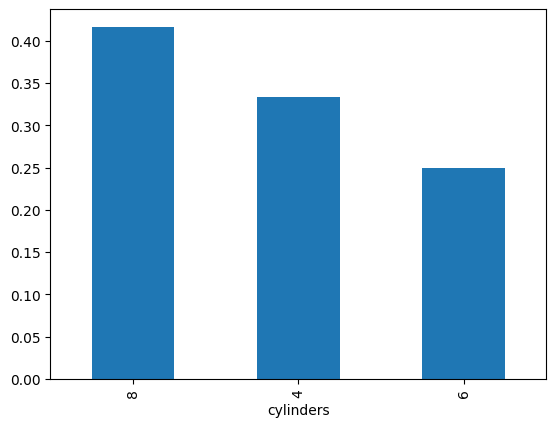

cylindrée moyenne : 6.5
H0 : La cylindrée moyene des voitures Ford entre 1970-1982 était de 6.5
pvalue : 0.1914052041475935
Nous n'avons pas suffisamment de preuves pour rejeter H0


Power_divergenceResult(statistic=np.float64(2.0), pvalue=np.float64(0.36787944117144245))

In [ ]:
import numpy as np
from scipy.stats import ttest_1samp
from scipy.stats import chisquare

df_ford = df[df['name'].str.contains('ford', case=False, na=False)]
df_ford["cylinders"].value_counts(normalize=True).plot(kind="bar")
plt.show()

cylinders_mean = (4 + 6 + 16) / 4
print(f"cylindrée moyenne : {cylinders_mean}")

alpha = 0.05
print('H0 : La cylindrée moyene des voitures Ford entre 1970-1982 était de 6.5')

pvalue = ttest_1samp(df_ford["cylinders"], 6.5).pvalue
print(f"pvalue : {pvalue}")
if pvalue < alpha:
	print("Nous avons suffisamment de preuves pour rejeter H0")
else:
	print("Nous n'avons pas suffisamment de preuves pour rejeter H0")

# correction
observed_frequencies = df_ford["cylinders"].value_counts().sort_index()
observed_frequencies

expected_frequencies = np.array([0.25, 0.25, 0.5]) * observed_frequencies.sum()
expected_frequencies

chisquare(f_exp=expected_frequencies, f_obs=observed_frequencies)
# H0 : 25% 4 cylindres, 25% 6 cylindres, 50% 8 cylindres
# Pas suffisamment de preuves importante pour rejeter H0

### 5. Les voitures à 4 cylindres ont en moyenne la même consommation d'essence au Japon, en Europe et aux États-Unis, dans les années 1970-1982. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [9]:
from scipy.stats import f_oneway

df_4_cylinders = df.query("cylinders == 4")
print(df_4_cylinders.groupby("origin")["mpg"].mean())
print(df_4_cylinders.groupby("origin")["mpg"].var())

print("H0 : Les voitures à 4 cylindres ont en moyenne la même consommation d'essence dans les années 70-82")
print()

alpha = 0.02
results = f_oneway(*df_4_cylinders.groupby("origin")["mpg"].apply(list))
print(results)

print("Test de ANOVA")
if results.pvalue < alpha:
	print("Nous avons suffisamment de preuves pour rejeter H0")
else:
	print("Nous n'avons pas suffisamment de preuves pour rejeter H0")

origin
europe    28.106557
japan     31.595652
usa       28.013043
Name: mpg, dtype: float64
origin
europe    39.577623
japan     29.547775
usa       20.853798
Name: mpg, dtype: float64
H0 : Les voitures à 4 cylindres ont en moyenne la même consommation d'essence dans les années 70-82

F_onewayResult(statistic=np.float64(9.538999089626692), pvalue=np.float64(0.00011134953247210174))
Test de ANOVA
Nous avons suffisamment de preuves pour rejeter H0


### 6. Les voitures européennes et japonaises ont en moyenne le même nombre de chevaux. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [10]:
from scipy.stats import ttest_ind

temp_df = df.query("origin == 'japan' or origin == 'europe'")
print(temp_df.groupby('origin')["horsepower"].describe())

print("H0 : Les voitures européennes et japonais ont en moyenne le même nombre de chevaux")
print()

pvalue = ttest_ind(df.query("origin == 'japan'")["horsepower"], df.query("origin == 'europe'")["horsepower"]).pvalue
alpha = 0.02

if(pvalue < 0.02):
	print("Nous pouvons affimer que les voitures européennes et japonaise n'ont en moyenne pas le même nbre de chevaux")
else:
	print("Nous ne pouvons pas rejeter H0")

        count       mean        std   min    25%   50%   75%    max
origin                                                             
europe   68.0  80.558824  20.157871  46.0  69.75  76.5  90.0  133.0
japan    79.0  79.835443  17.819199  52.0  67.00  75.0  95.0  132.0
H0 : Les voitures européennes et japonais ont en moyenne le même nombre de chevaux

Nous ne pouvons pas rejeter H0


### 7. Un spécialiste vous dit que les constructeurs Ford et Dodge produisaient dans les années 70-82 des voitures avec un nombre de cylindres équivalent. Testez cette affirmation et concluez avec un niveau de confiance de 98 % (alpha = 0,02).

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

filtered_df = df[df['name'].str.contains('ford|dodge', case=False, na=False)]
filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')
# print(filtered_df)

print(filtered_df.groupby("brand")["cylinders"].mean())
print("H0 : Les voitures produites par Ford et Dodge avaient en moyenne le meme nbre de cylindres")
print()

alpha = 0.02
pvalue = ttest_ind(filtered_df.query("brand == 'ford'")["cylinders"], filtered_df.query("brand == 'dodge'")["cylinders"]).pvalue
if(pvalue < alpha):
	print("Nous pouvons affirmer que les voitures produites par Ford et Dodge n'avaient en moyenne pas le même nbre de cylindre")
else:
	print("Nous n'avons pas suffisamment de preuves pour rejeter H0")

# correction
pd.crosstab(filtered_df["brand"], filtered_df["cylinders"])
chi2_contingency(pd.crosstab(filtered_df["brand"], filtered_df["cylinders"]))


brand
dodge    6.000000
ford     6.166667
Name: cylinders, dtype: float64
H0 : Les voitures produites par Ford et Dodge avaient en moyenne le meme nbre de cylindres

Nous n'avons pas suffisamment de preuves pour rejeter H0


C:\Users\olivi\AppData\Local\Temp\ipykernel_31616\1015570423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['brand'] = filtered_df['name'].apply(lambda x: 'ford' if 'ford' in x else 'dodge')


Chi2ContingencyResult(statistic=np.float64(1.4056122448979598), pvalue=np.float64(0.49519377793169383), dof=2, expected_freq=array([[10.31578947,  5.89473684, 11.78947368],
       [17.68421053, 10.10526316, 20.21052632]]))